In [237]:
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Load data from lulu_scrap.py

In [239]:
df = pickle.load( open( "20210125_leggings_hoodies_shorts_tops", "rb" ) )
df.head()

,product_name,url,type,current_price,old_price,stars,material,total_reviews,avg_rating,material_clean,material_clean_list,five_stars,four_stars,three_stars,two_stars,one_stars
0,"lululemon Align™ Pant 28"" *Lunar New Year",https://shop.lululemon.com/p/women-pants/Align...,women-pants,118,118,"[1, 0, 0, 1, 0]","[80% Nylon, 20% Lycra® elastane]",2,3.500000,"[Lycra® elastane, Nylon]","Lycra® elastane,Nylon",1,0,0,1,0
1,"Wunder Under High-Rise Tight 25"" Full-On Luxtr...",https://shop.lululemon.com/p/women-pants/Wunde...,women-pants,118,118,"[4, 2, 1, 4, 2]","[69% Nylon, 31% Lycra® elastane]",13,3.153846,"[Lycra® elastane, Nylon]","Lycra® elastane,Nylon",4,2,1,4,2
2,"lululemon Align™ Pant 25""",https://shop.lululemon.com/p/women-pants/Align...,women-pants,98,98,"[4578, 1367, 2603, 2886, 1770]","[81% Nylon, 19% Lycra® elastane]",13204,3.310285,"[Lycra® elastane, Nylon]","Lycra® elastane,Nylon",4578,1367,2603,2886,1770
3,"lululemon Align™ Pant 28""",https://shop.lululemon.com/p/women-pants/Align...,women-pants,98,98,"[3739, 934, 1473, 1870, 1538]","[81% Nylon, 19% Lycra® elastane]",9554,3.362780,"[Lycra® elastane, Nylon]","Lycra® elastane,Nylon",3739,934,1473,1870,1538
4,"Wunder Train High-Rise Tight 25""",https://shop.lululemon.com/p/womens-leggings/W...,womens-leggings,98,98,"[1718, 370, 236, 211, 198]","[56% Polyester, 33% Coolmax® polyester, 11% Ly...",2733,4.170509,"[Coolmax® polyester, Lycra® elastane, Nylon, P...","Coolmax® polyester,Lycra® elastane,Nylon,Polye...",1718,370,236,211,198


# Preprocessing of data

## Materials

In [240]:
material_list = ','.join(df['material_clean_list'].unique())
material = set(list(material_list.split(",")))
material = list(material)
material

['Modal',
 'Lenzing® modal',
 'Wool',
 'Tencel® lyocell',
 'Lyocell',
 'Polyester',
 'Viscose',
 'X-static® nylon',
 'Lurex® metallic',
 'Cupro',
 'Coolmax® polyester',
 'Pima cotton',
 'None listed',
 'Cotton',
 'Recycled nylon',
 'Silk',
 'Elastane',
 'Polyurethane foam',
 'Lycra® elastane',
 'Cashmere',
 'Acrylic',
 'Nylon',
 'Xtra life lycra® elastane',
 'Linen',
 'Merino wool',
 'Recycled polyester']

In [242]:
df_mat = df.copy()

for item in material:
    df_mat[item] = df['material_clean_list'].str.contains(item, case = True).astype(int)

df_mat = df_mat.drop(['None listed'], axis = 1) # drop this to prevent multi collinearity
df_mat.head()

,product_name,url,type,current_price,old_price,stars,material,total_reviews,avg_rating,material_clean,...,Elastane,Polyurethane foam,Lycra® elastane,Cashmere,Acrylic,Nylon,Xtra life lycra® elastane,Linen,Merino wool,Recycled polyester
0,"lululemon Align™ Pant 28"" *Lunar New Year",https://shop.lululemon.com/p/women-pants/Align...,women-pants,118,118,"[1, 0, 0, 1, 0]","[80% Nylon, 20% Lycra® elastane]",2,3.500000,"[Lycra® elastane, Nylon]",...,0,0,1,0,0,1,0,0,0,0
1,"Wunder Under High-Rise Tight 25"" Full-On Luxtr...",https://shop.lululemon.com/p/women-pants/Wunde...,women-pants,118,118,"[4, 2, 1, 4, 2]","[69% Nylon, 31% Lycra® elastane]",13,3.153846,"[Lycra® elastane, Nylon]",...,0,0,1,0,0,1,0,0,0,0
2,"lululemon Align™ Pant 25""",https://shop.lululemon.com/p/women-pants/Align...,women-pants,98,98,"[4578, 1367, 2603, 2886, 1770]","[81% Nylon, 19% Lycra® elastane]",13204,3.310285,"[Lycra® elastane, Nylon]",...,0,0,1,0,0,1,0,0,0,0
3,"lululemon Align™ Pant 28""",https://shop.lululemon.com/p/women-pants/Align...,women-pants,98,98,"[3739, 934, 1473, 1870, 1538]","[81% Nylon, 19% Lycra® elastane]",9554,3.362780,"[Lycra® elastane, Nylon]",...,0,0,1,0,0,1,0,0,0,0
4,"Wunder Train High-Rise Tight 25""",https://shop.lululemon.com/p/womens-leggings/W...,womens-leggings,98,98,"[1718, 370, 236, 211, 198]","[56% Polyester, 33% Coolmax® polyester, 11% Ly...",2733,4.170509,"[Coolmax® polyester, Lycra® elastane, Nylon, P...",...,0,0,1,0,0,1,0,0,0,0


## Types of Items

In [243]:
type_list = df_mat['type'].unique()
type_list = list(type_list)
type_list

['women-pants',
 'womens-leggings',
 'women-crops',
 'tops-swim',
 'womens-outerwear',
 'jackets-and-hoodies-jackets',
 'women-sweaters-and-wraps',
 'tops-long-sleeve',
 'women-shorts',
 'women-tanks',
 'tops-short-sleeve',
 'womens-t-shirts',
 'mens-t-shirts',
 'men-ss-tops']

In [246]:
for item_type in type_list:
    df_mat[item_type] = df_mat['type'].str.contains(item_type, case = True).astype(int)

df_mat.head()

,product_name,url,type,current_price,old_price,stars,material,total_reviews,avg_rating,material_clean,...,womens-outerwear,jackets-and-hoodies-jackets,women-sweaters-and-wraps,tops-long-sleeve,women-shorts,women-tanks,tops-short-sleeve,womens-t-shirts,mens-t-shirts,men-ss-tops
0,"lululemon Align™ Pant 28"" *Lunar New Year",https://shop.lululemon.com/p/women-pants/Align...,women-pants,118,118,"[1, 0, 0, 1, 0]","[80% Nylon, 20% Lycra® elastane]",2,3.500000,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,0
1,"Wunder Under High-Rise Tight 25"" Full-On Luxtr...",https://shop.lululemon.com/p/women-pants/Wunde...,women-pants,118,118,"[4, 2, 1, 4, 2]","[69% Nylon, 31% Lycra® elastane]",13,3.153846,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,0
2,"lululemon Align™ Pant 25""",https://shop.lululemon.com/p/women-pants/Align...,women-pants,98,98,"[4578, 1367, 2603, 2886, 1770]","[81% Nylon, 19% Lycra® elastane]",13204,3.310285,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,0
3,"lululemon Align™ Pant 28""",https://shop.lululemon.com/p/women-pants/Align...,women-pants,98,98,"[3739, 934, 1473, 1870, 1538]","[81% Nylon, 19% Lycra® elastane]",9554,3.362780,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,0
4,"Wunder Train High-Rise Tight 25""",https://shop.lululemon.com/p/womens-leggings/W...,womens-leggings,98,98,"[1718, 370, 236, 211, 198]","[56% Polyester, 33% Coolmax® polyester, 11% Ly...",2733,4.170509,"[Coolmax® polyester, Lycra® elastane, Nylon, P...",...,0,0,0,0,0,0,0,0,0,0


## Save preprocessed data into pickle

In [247]:
pickle.dump(df_mat, open( "20210126_preprocess", "wb" ) )

# Linear Regression Model

In [249]:
df =  df_mat.copy()
df.head()

,product_name,url,type,current_price,old_price,stars,material,total_reviews,avg_rating,material_clean,...,womens-outerwear,jackets-and-hoodies-jackets,women-sweaters-and-wraps,tops-long-sleeve,women-shorts,women-tanks,tops-short-sleeve,womens-t-shirts,mens-t-shirts,men-ss-tops
0,"lululemon Align™ Pant 28"" *Lunar New Year",https://shop.lululemon.com/p/women-pants/Align...,women-pants,118,118,"[1, 0, 0, 1, 0]","[80% Nylon, 20% Lycra® elastane]",2,3.500000,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,0
1,"Wunder Under High-Rise Tight 25"" Full-On Luxtr...",https://shop.lululemon.com/p/women-pants/Wunde...,women-pants,118,118,"[4, 2, 1, 4, 2]","[69% Nylon, 31% Lycra® elastane]",13,3.153846,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,0
2,"lululemon Align™ Pant 25""",https://shop.lululemon.com/p/women-pants/Align...,women-pants,98,98,"[4578, 1367, 2603, 2886, 1770]","[81% Nylon, 19% Lycra® elastane]",13204,3.310285,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,0
3,"lululemon Align™ Pant 28""",https://shop.lululemon.com/p/women-pants/Align...,women-pants,98,98,"[3739, 934, 1473, 1870, 1538]","[81% Nylon, 19% Lycra® elastane]",9554,3.362780,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,0
4,"Wunder Train High-Rise Tight 25""",https://shop.lululemon.com/p/womens-leggings/W...,womens-leggings,98,98,"[1718, 370, 236, 211, 198]","[56% Polyester, 33% Coolmax® polyester, 11% Ly...",2733,4.170509,"[Coolmax® polyester, Lycra® elastane, Nylon, P...",...,0,0,0,0,0,0,0,0,0,0


In [250]:
df.columns

Index(['product_name', 'url', 'type', 'current_price', 'old_price', 'stars',
       'material', 'total_reviews', 'avg_rating', 'material_clean',
       'material_clean_list', 'five_stars', 'four_stars', 'three_stars',
       'two_stars', 'one_stars', 'Modal', 'Lenzing® modal', 'Wool',
       'Tencel® lyocell', 'Lyocell', 'Polyester', 'Viscose', 'X-static® nylon',
       'Lurex® metallic', 'Cupro', 'Coolmax® polyester', 'Pima cotton',
       'Cotton', 'Recycled nylon', 'Silk', 'Elastane', 'Polyurethane foam',
       'Lycra® elastane', 'Cashmere', 'Acrylic', 'Nylon',
       'Xtra life lycra® elastane', 'Linen', 'Merino wool',
       'Recycled polyester', 'women-pants', 'womens-leggings', 'women-crops',
       'tops-swim', 'womens-outerwear', 'jackets-and-hoodies-jackets',
       'women-sweaters-and-wraps', 'tops-long-sleeve', 'women-shorts',
       'women-tanks', 'tops-short-sleeve', 'womens-t-shirts', 'mens-t-shirts',
       'men-ss-tops'],
      dtype='object')

In [253]:
data_preprocessed = pd.concat([df.iloc[:,16:41], df.iloc[:,7:9],df.iloc[:,3:4], df.iloc[:,11:16], df.iloc[:,-14:]], axis=1)
data_preprocessed

,Modal,Lenzing® modal,Wool,Tencel® lyocell,Lyocell,Polyester,Viscose,X-static® nylon,Lurex® metallic,Cupro,...,womens-outerwear,jackets-and-hoodies-jackets,women-sweaters-and-wraps,tops-long-sleeve,women-shorts,women-tanks,tops-short-sleeve,womens-t-shirts,mens-t-shirts,men-ss-tops
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [354]:
data_preprocessed.columns

Index(['Modal', 'Lenzing® modal', 'Wool', 'Tencel® lyocell', 'Lyocell',
       'Polyester', 'Viscose', 'X-static® nylon', 'Lurex® metallic', 'Cupro',
       'Coolmax® polyester', 'Pima cotton', 'Cotton', 'Recycled nylon', 'Silk',
       'Elastane', 'Polyurethane foam', 'Lycra® elastane', 'Cashmere',
       'Acrylic', 'Nylon', 'Xtra life lycra® elastane', 'Linen', 'Merino wool',
       'Recycled polyester', 'total_reviews', 'avg_rating', 'current_price',
       'five_stars', 'four_stars', 'three_stars', 'two_stars', 'one_stars',
       'women-pants', 'womens-leggings', 'women-crops', 'tops-swim',
       'womens-outerwear', 'jackets-and-hoodies-jackets',
       'women-sweaters-and-wraps', 'tops-long-sleeve', 'women-shorts',
       'women-tanks', 'tops-short-sleeve', 'womens-t-shirts', 'mens-t-shirts',
       'men-ss-tops'],
      dtype='object')

## Declare inputs and targets

In [295]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['current_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['current_price'],axis=1)

## Scale the data

In [361]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [362]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [363]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.5, random_state=365)

In [364]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [365]:
y_hat = reg.predict(x_train)
y_hat

array([100.77734375,  53.71484375,  62.27734375,  99.15234375,
       107.40234375,  87.90234375,  57.27734375,  62.52734375,
        97.40234375,  36.27734375,  48.65234375,  35.90234375,
        43.77734375,  82.96484375,  42.65234375,  97.27734375,
        95.90234375,  49.15234375,  48.04296875,  52.08984375,
        70.77734375,  56.65234375,  98.71484375,  52.33984375,
        48.27734375,  79.46484375, 100.02734375,  60.27734375,
        92.96484375,  48.27734375,  97.52734375,  55.40234375,
        42.40234375,  55.40234375,  47.65234375,  46.77734375,
        54.77734375,  95.77734375,  35.65234375,  92.90234375,
        71.52734375,  37.65234375, 107.90234375,  99.90234375,
       102.46484375,  55.71484375,  46.15234375, 103.15234375,
        57.15234375,  55.40234375, 111.65234375,  62.02734375,
        73.77734375,  53.96484375,  42.27734375,  55.77734375,
       102.02734375,  71.77734375,  47.52734375, 109.02734375,
        46.77734375,  45.52734375,  70.27734375,  98.27

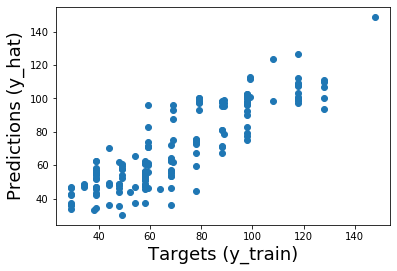

In [366]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions


# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# # We want the x-axis and the y-axis to be the same
# plt.xlim(6,13)
# plt.ylim(6,13)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

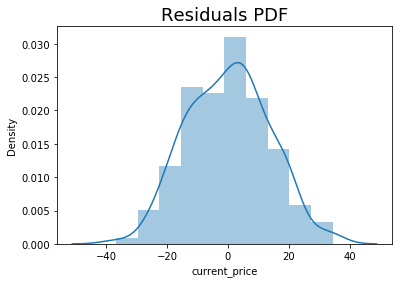

In [367]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [368]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.7568089684191551

## Finding weights and biases

In [369]:
# Obtain the bias (intercept) of the regression
reg.intercept_

-12810672156564.457

In [370]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-1.28860407e+00, -1.28512244e+00, -4.31527684e+00,  8.95655745e-02,
       -4.55737718e-01, -5.21345937e-01, -2.24304274e-01,  3.48058272e-01,
       -1.83852598e+13,  2.78252491e-01,  1.42510024e+00, -2.89363835e+00,
       -5.63884273e+00, -5.97325156e-02, -7.28071710e+13,  4.63329156e+00,
        5.99463546e+13, -1.36129028e+00,  1.60287946e+13, -2.52293302e+13,
        1.46170139e+00, -8.27821383e-01, -2.74794250e+00, -3.21701533e+13,
       -2.64142791e+00,  6.69348678e+13,  6.53607631e-01, -2.69798880e+13,
       -7.17518791e+12, -1.16665303e+13, -1.34717438e+13, -9.38046561e+12,
        4.01512295e+14,  3.12698796e+14,  2.50761589e+14, -2.68004967e+13,
        3.40957388e+14,  1.31699579e+14,  1.47022013e+14,  4.21100315e+14,
        4.61871262e+14,  4.82268062e+14,  3.40957388e+14, -3.44686185e-01,
        2.34174718e+14, -2.51635837e+12])

In [371]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary.sort_values(by='Weights', ascending=False)

,Features,Weights
41,women-tanks,482268061570241.00
40,women-shorts,461871261640953.00
39,tops-long-sleeve,421100315293377.50
32,women-pants,401512295421355.19
36,womens-outerwear,340957388461418.69
42,tops-short-sleeve,340957388461403.25
33,womens-leggings,312698796039135.44
34,women-crops,250761588575747.03
44,mens-t-shirts,234174717910601.91
38,women-sweaters-and-wraps,147022013376755.34


## Testing

In [372]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

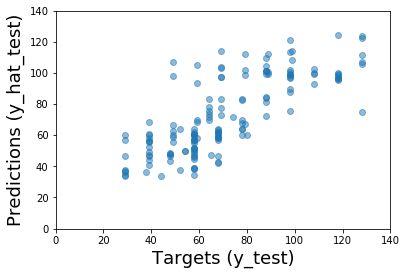

In [373]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.5)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(0,140)
plt.ylim(0,140)
plt.show()

In [374]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame((y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,69.65
1,114.03
2,68.40
3,66.78
4,38.40


In [375]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = (y_test.reset_index(drop=True))
df_pf
# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,69.65,59
1,114.03,69
2,68.40,39
3,66.78,49
4,38.40,58
5,83.28,78
6,98.53,49
7,99.28,88
8,112.65,79
9,97.28,69


In [376]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [377]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,69.65,59,-10.65,18.05
1,114.03,69,-45.03,65.26
2,68.40,39,-29.40,75.39
3,66.78,49,-17.78,36.28
4,38.40,58,19.60,33.79


In [378]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,168.00,168.00,168.00,168.00
mean,-25545090312266.69,72.69,25545090312339.38,60116829454618.91
std,218332746426424.81,27.29,218332746426425.44,341133919154680.38
min,-1703773049654574.75,29.00,-778162809226669.50,0.09
25%,50.50,57.00,-11.53,8.00
50%,63.93,68.00,0.15,16.31
75%,97.78,89.00,10.16,29.39
max,778162809226778.50,148.00,1703773049654702.75,3227270405679197.00


In [379]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
69,48.04,48,-0.04,0.09
23,97.53,98,0.47,0.48
125,48.28,48,-0.28,0.58
73,57.65,58,0.35,0.60
59,98.71,98,-0.71,0.73
79,98.90,98,-0.90,0.92
49,58.28,59,0.72,1.22
89,96.78,98,1.22,1.25
105,57.15,58,0.85,1.46
135,99.59,98,-1.59,1.62


## Using reg.predict and apply to the entire original data set

In [356]:
data_preprocessed.head() # = pd.concat([df.iloc[:,16:41], df.iloc[:,7:9],df.iloc[:,3:4], df.iloc[:,11:16], df.iloc[:,-14:]], axis=1)

,Modal,Lenzing® modal,Wool,Tencel® lyocell,Lyocell,Polyester,Viscose,X-static® nylon,Lurex® metallic,Cupro,...,womens-outerwear,jackets-and-hoodies-jackets,women-sweaters-and-wraps,tops-long-sleeve,women-shorts,women-tanks,tops-short-sleeve,womens-t-shirts,mens-t-shirts,men-ss-tops
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [381]:
input_df = data_preprocessed.drop(['current_price'], axis = 1)

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(input_df)

StandardScaler()

In [384]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[-0.14608718, -0.14608718, -0.12309149, ..., -0.19274777,
        -0.20092952, -0.05471757],
       [-0.14608718, -0.14608718, -0.12309149, ..., -0.19274777,
        -0.20092952, -0.05471757],
       [-0.14608718, -0.14608718, -0.12309149, ..., -0.19274777,
        -0.20092952, -0.05471757],
       ...,
       [-0.14608718, -0.14608718, -0.12309149, ..., -0.19274777,
        -0.20092952, -0.05471757],
       [ 6.84522774, -0.14608718, -0.12309149, ..., -0.19274777,
        -0.20092952, -0.05471757],
       [ 6.84522774, -0.14608718, -0.12309149, ..., -0.19274777,
        -0.20092952, -0.05471757]])

In [385]:
model_price = reg.predict(inputs_scaled)
model_price

array([ 9.92148438e+01,  9.92148438e+01,  8.27148438e+01,  7.74648438e+01,
        8.79648438e+01,  8.44648438e+01,  9.74648438e+01,  9.67148438e+01,
        1.11714844e+02,  1.11214844e+02,  1.06964844e+02,  1.00714844e+02,
        1.01714844e+02,  9.87148438e+01,  1.02464844e+02,  9.74648438e+01,
        9.37148438e+01,  9.64648438e+01,  1.10214844e+02,  1.07464844e+02,
        9.92148438e+01,  9.74648438e+01,  9.22148438e+01,  9.64648438e+01,
        9.72148438e+01,  1.04714844e+02,  1.00714844e+02,  9.67148438e+01,
        9.74648438e+01,  1.07964844e+02,  9.57148438e+01,  9.74648438e+01,
        9.99648438e+01,  1.01464844e+02,  1.00714844e+02,  9.69648438e+01,
        1.06214844e+02,  1.09714844e+02,  9.57148438e+01,  1.01714844e+02,
        9.87148438e+01,  9.77148438e+01,  7.47148438e+01,  1.01464844e+02,
        9.82148438e+01,  1.00214844e+02,  9.87148438e+01,  9.82148438e+01,
        9.94648438e+01, -1.70377305e+15,  9.82148438e+01,  9.89648438e+01,
        1.12214844e+02,  

In [386]:
df_w_model_price = df.copy()
df_w_model_price['model_price'] = model_price
df_w_model_price.head()

,product_name,url,type,current_price,old_price,stars,material,total_reviews,avg_rating,material_clean,...,jackets-and-hoodies-jackets,women-sweaters-and-wraps,tops-long-sleeve,women-shorts,women-tanks,tops-short-sleeve,womens-t-shirts,mens-t-shirts,men-ss-tops,model_price
0,"lululemon Align™ Pant 28"" *Lunar New Year",https://shop.lululemon.com/p/women-pants/Align...,women-pants,118,118,"[1, 0, 0, 1, 0]","[80% Nylon, 20% Lycra® elastane]",2,3.50,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,99.21
1,"Wunder Under High-Rise Tight 25"" Full-On Luxtr...",https://shop.lululemon.com/p/women-pants/Wunde...,women-pants,118,118,"[4, 2, 1, 4, 2]","[69% Nylon, 31% Lycra® elastane]",13,3.15,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,99.21
2,"lululemon Align™ Pant 25""",https://shop.lululemon.com/p/women-pants/Align...,women-pants,98,98,"[4578, 1367, 2603, 2886, 1770]","[81% Nylon, 19% Lycra® elastane]",13204,3.31,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,82.71
3,"lululemon Align™ Pant 28""",https://shop.lululemon.com/p/women-pants/Align...,women-pants,98,98,"[3739, 934, 1473, 1870, 1538]","[81% Nylon, 19% Lycra® elastane]",9554,3.36,"[Lycra® elastane, Nylon]",...,0,0,0,0,0,0,0,0,0,77.46
4,"Wunder Train High-Rise Tight 25""",https://shop.lululemon.com/p/womens-leggings/W...,womens-leggings,98,98,"[1718, 370, 236, 211, 198]","[56% Polyester, 33% Coolmax® polyester, 11% Ly...",2733,4.17,"[Coolmax® polyester, Lycra® elastane, Nylon, P...",...,0,0,0,0,0,0,0,0,0,87.96


In [400]:
brush = alt.selection(type='interval')

line = pd.DataFrame({
    'current_price': [0, 150],
    'model_price':  [0, 150],
})

line_plot = alt.Chart(line).mark_line(color= 'red').encode(
    x= 'current_price',
    y= 'model_price',
)

points = alt.Chart(df_w_model_price).mark_point().encode(
    x= alt.X('current_price', scale=alt.Scale(domain=(0, 150))),
    y= alt.Y('model_price', scale=alt.Scale(domain=(0, 150))),
    color=alt.condition(brush, 'type', alt.value('lightgray')),
    size='total_reviews',
    tooltip=['product_name', 'current_price', 'old_price', 'type', 'model_price', 'avg_rating', 'material_clean_list']
).add_selection(
    brush
).properties(
    width=300,
    height=300
).interactive()

points + line_plot

alt.LayerChart(...)